In [1]:
import pandas as pd
train = pd.read_csv('train.csv', delimiter=',', index_col='datetime', parse_dates=True)
train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
train['year'] = train.index.year
train['month'] = train.index.month
train['day'] = train.index.day
train['hour'] = train.index.hour

#Саид
season = train['month']
season = season.apply(lambda s: 4 if int(s) == 1 or int(s) == 2 else (int(s) - 3) // 3 + 1)   #подумать
train = train.drop('season', axis = 1)
train.insert(5, 'season', season)

train.head(3)

,holiday,workingday,weather,temp,atemp,season,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,9.84,14.395,4,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,0,0,1,9.02,13.635,4,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,0,0,1,9.02,13.635,4,80,0.0,5,27,32,2011,1,1,2


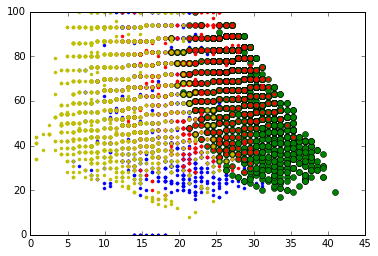

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#ax.set_yscale('log')

#x1 = train['windspeed']
#y1 = train['count']
#plt.plot(x1, y1, 'b.')

filtered1 = train.query('season == 1')
filtered2 = train.query('season == 2')
filtered3 = train.query('season == 3')
filtered4 = train.query('season == 4')
    
pr1 = 'temp'
pr2 = 'humidity'
x1 = filtered1[pr1]
y1 = filtered1[pr2]
x2 = filtered2[pr1]
y2 = filtered2[pr2]
x3 = filtered3[pr1]
y3 = filtered3[pr2]
x4 = filtered4[pr1]
y4 = filtered4[pr2]
plt.plot(x1, y1, 'b.', x2, y2, 'go', x3, y3, 'r.', x4, y4, 'y.')

plt.show()

In [4]:
# hour = train['datetime'].apply(lambda s: s.split(' ')[1].split(':')[0])
# hour = hour.apply(lambda s: int(s))
# train.insert(1, 'hour', hour)
# train.head(15)
hour = train['hour']

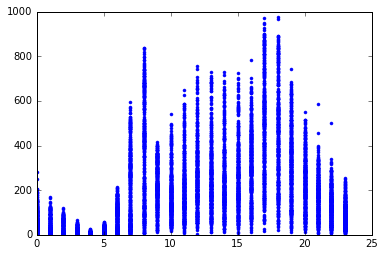

In [5]:
x1 = train['hour']
y1 = train['count']
plt.plot(x1, y1, 'b.')

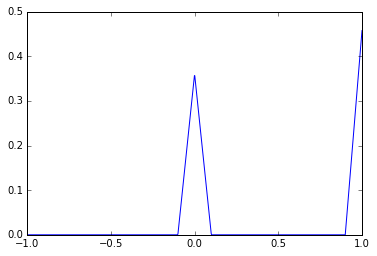

In [6]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
i0 = train['count']
kde0 = KernelDensity(kernel='linear', bandwidth=0.1).fit(train.ix[i0,'hour'].reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))  #score_samples возвращает логарифм плотности

# i1 = train['count'] >499
# kde1 = KernelDensity(kernel='linear', bandwidth=0.1).fit(train.ix[i1,'hour'].reshape(-1, 1))
# X_plot_1 = np.linspace(-1, 1, 1000).reshape(-1, 1)
# Dens1 = np.exp(kde1.score_samples(X_plot_1))  #score_samples возвращает логарифм плотности

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(X_plot, Dens0, color='blue')
# ax.plot(X_plot_1, Dens1, color='green')

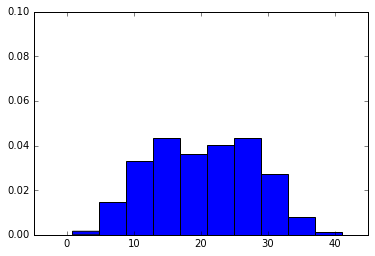

In [7]:
import matplotlib.pyplot as plt1
fig1, ax1 = plt1.subplots()

ax1.hist(train['temp'], bins = 10, normed = True, color = 'blue')

ax1.axis([-5,45, 0, 0.1])
plt1.show()